# Linear Regression - BATCH GRADIENT DESCENT(UNIVARIATE)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data1.txt')

In [3]:
X_train = df.iloc[:,0]
Y_train = df.iloc[:,1]

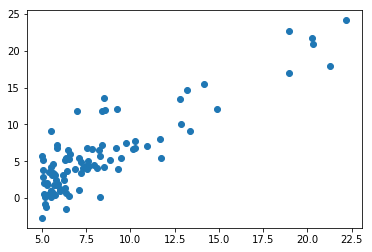

In [4]:
plt.scatter(X_train,Y_train)
plt.show()

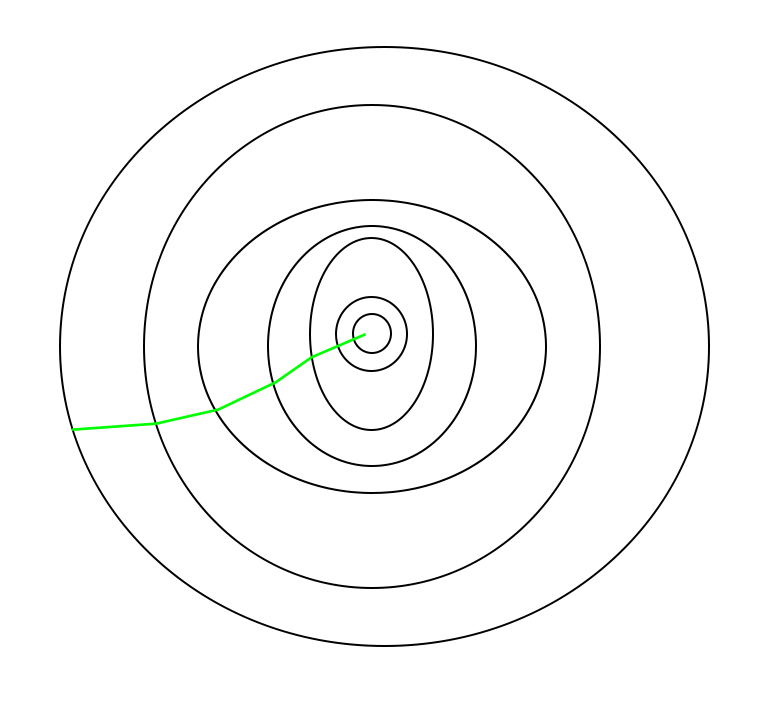

In [9]:
#Path taken by Batch Gradient Descent 
from IPython.display import Image
Image(filename='gdp.png')

In [10]:
#Hypothesis
def hypothesis(theta, X):
    h = np.ones((X.shape[0],1))
    for i in range(0,X.shape[0]):
        x = np.concatenate((np.ones(1), np.array([X[i]])), axis = 0)
        h[i] = float(np.matmul(theta, x))
    h = h.reshape(X.shape[0])
    return h

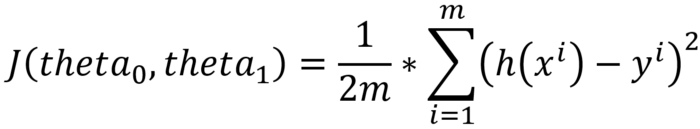

In [11]:
from IPython.display import Image
Image(filename='cost_function.png')

In [24]:
#Batch Grdient descent
def BGD(theta, alpha, num_iters, h, X, y):
    cost = np.ones(num_iters)
    theta_0 = np.ones(num_iters)
    theta_1 = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        theta[1] = theta[1] - (alpha/X.shape[0]) * sum((h - y) * X)
        h = hypothesis(theta,X)
        cost[i] = 1/(X.shape[0])*0.5*sum(np.square(h-y))
        theta_0[i] = theta[0]
        theta_1[i] = theta[1]
    theta = theta.reshape(1,2)
        
    return theta,theta_0,theta_1,cost

In [25]:
def linear_regression(X, y, alpha, num_iters):
    # initializing the parameter vector...
    theta = np.zeros(2)
    # hypothesis calculation....
    h = hypothesis(theta, X)    
    # returning the optimized parameters by Gradient Descent...
    theta,theta_0,theta_1,cost= BGD(theta,alpha,num_iters,h,X,y)
    return theta, theta_0, theta_1, cost 

In [28]:
theta, theta_0, theta_1, cost  = linear_regression(X_train, Y_train, 0.0001, 300)

In [29]:
theta

array([[0.04882682, 0.7212499 ]])

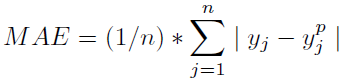

In [30]:
from IPython.display import Image
Image(filename='1.png')

In [31]:
# Mean Absolute Error
training_predictions = hypothesis(theta, X_train)
ae = 0 # Absolute Error
for i in range(0,Y_train.shape[0]):
    ae = ae + abs(training_predictions[i] - Y_train[i])
MAE = ae/Y_train.shape[0] # Mean Absolute Error

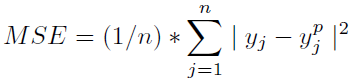

In [32]:
from IPython.display import Image
Image(filename='2.png')

In [33]:
# Mean Square Error
from math import *
se = 0 # Square Error
for i in range(0,Y_train.shape[0]):
    se = se + pow((training_predictions[i] - Y_train[i]), 2)
MSE = se/Y_train.shape[0] # Mean Square Error

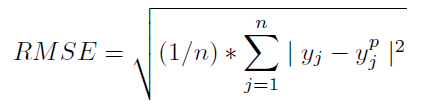

In [34]:
from IPython.display import Image
Image(filename='3.png')

In [35]:
from math import *
RMSE = sqrt(MSE) # Root Mean Square Error

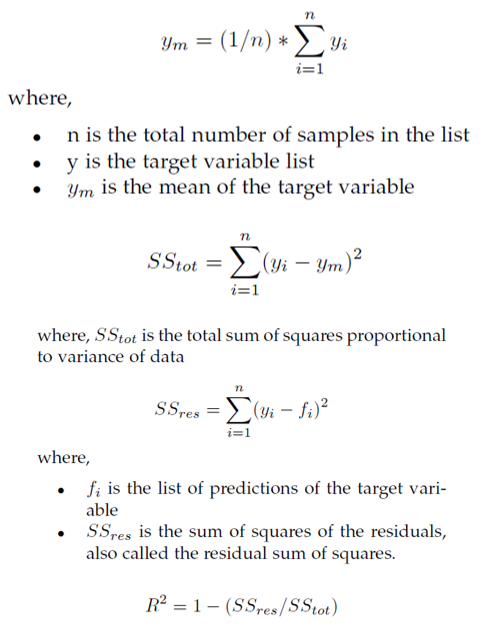

In [37]:
from IPython.display import Image
Image(filename='4.png')

In [38]:
import numpy as np
y_m = np.mean(Y_train)
SStot = 0
for i in range(0,Y_train.shape[0]):
    SStot = SStot + pow((Y_train[i] - y_m), 2)
SSres = 0
for i in range(0,Y_train.shape[0]):
    SSres = SSres + pow((Y_train[i] - training_predictions[i]), 2)
R_Square_Score = 1 - (SSres/SStot)

In [39]:
print('Mean Absolute Error',MAE)
print('Mean Square Error',MSE)
print('RMSE',RMSE)
print('R2',R_Square_Score)

Mean Absolute Error 2.5217814167871975
Mean Square Error 10.592163042172405
RMSE 3.2545603454495056
R2 0.6336051673317864


Text(0, 0.5, 'Cost')

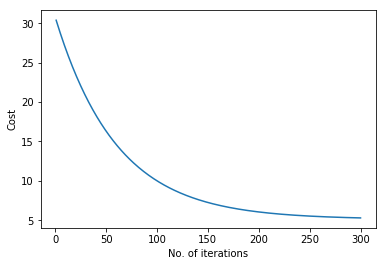

In [40]:
import matplotlib.pyplot as plt
cost = list(cost)
n_iterations = [x for x in range(1,301)]
plt.plot(n_iterations, cost)
plt.xlabel('No. of iterations')
plt.ylabel('Cost')